In [2]:
import pandas as pd
import numpy as np
import logging

from sklearn.model_selection import train_test_split
from pyarc import CBA, TransactionDB
from pyarc.algorithms import (
    top_rules,
    createCARs,
    M1Algorithm,
    M2Algorithm
)
#import describe_dataframe as dd
from IPython.core.display import HTML
import math
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np

In [3]:
train_hamza=pd.read_csv("train_hamza.csv")

In [4]:
len(train_hamza)

22480

In [5]:
train_hamza.rename(columns={'chr_train':'Chr',
                          'pos_train':'Pos',
                          'Ref_train':'Ref','Alt_train':'Alt'}, 
                 inplace=True)

In [6]:
train_hamza.head(5)

,Chr,Pos,Ref,Alt,Ref.A,Ref.C,Ref.G,Ref.T,Anc.A,Anc.C,...,cAA,TopologicalCoefficient,AverageShortestPathLength,Degree,BetweennessCentrality,Radiality,NeighborhoodConnectivity,ClosenessCentrality,Stress,clnsig
0,2,121742165,A,G,1,0,0,0,1,0,...,0.954264,-0.045296,-0.147788,-0.565602,-0.396191,0.147788,1.167485,0.061474,-0.382214,Benign
1,13,32953614,T,A,0,0,0,1,0,0,...,-1.349181,-0.467235,-0.460441,0.498630,-0.161334,0.460441,-0.043980,0.407519,-0.149897,Pathogenic
2,4,39271653,A,G,1,0,0,0,1,0,...,0.954264,0.161461,0.879988,-0.565602,-0.441593,-0.879988,-1.193701,-0.942012,-0.482363,Benign
3,12,91552187,T,C,0,0,0,1,0,0,...,0.954264,-0.495184,-0.338820,0.361800,0.152820,0.338821,-0.647958,0.270377,0.277833,Benign
4,13,25486911,G,T,0,0,1,0,0,0,...,0.032886,-0.397029,-0.294013,-0.215926,-0.261528,0.294013,-0.060731,0.220675,-0.292890,Benign


In [7]:
train_hamza=train_hamza.iloc[:, [0,1,2,3]]
train_hamza.head(5)

,Chr,Pos,Ref,Alt
0,2,121742165,A,G
1,13,32953614,T,A
2,4,39271653,A,G
3,12,91552187,T,C
4,13,25486911,G,T


In [8]:
train_hamza=train_hamza.drop_duplicates(subset=['Chr', 'Pos', 'Ref', 'Alt'],keep="first")
len(train_hamza)

22102

In [9]:
####                                                                              ####
####                                                                              ####
####                        Adding our ACMG rules as columns                      ####
####                                                                              ####
####                                                                              ####

In [10]:
train_kazim=pd.read_csv("train_kazim.csv")
train_kazim.head(5)
train_kazim.columns.get_loc("BP8")

#train_kazim.columns.get_loc("CLNSIG")


193

In [11]:

# index=[]
# for x in range(0, 194):

#     index.append(x)
 
# index.append(151) 


train_kazim=train_kazim.iloc[:,0:194]


In [12]:
len(train_kazim)

28101

In [13]:
train_kazim.head(5)

,Chr,Pos,Ref,Anc,Alt,isTv,isDerived,Consequence,gnomAD_exome_ALL,gnomAD_exome_AFR,...,BS4,BS5,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BP8
0,12,112888156,A,A,T,True,True,NON_SYNONYMOUS,0.000000,0.000,...,0,0,0,0,0,0,0,0,0,0
1,3,10191488,C,C,T,False,True,STOP_GAINED,0.000000,0.000,...,0,0,0,0,0,0,0,0,0,0
2,17,41246173,T,T,A,True,True,STOP_GAINED,0.000000,0.000,...,0,0,0,0,0,0,0,0,0,0
3,1,237527650,C,C,T,False,True,SPLICE_SITE,0.000005,0.000,...,0,0,0,0,0,0,0,1,0,0
4,22,50502590,A,A,T,True,True,NON_SYNONYMOUS,0.001500,0.021,...,0,0,0,0,0,0,0,1,0,0


In [14]:
train_kazim=train_kazim.drop_duplicates(subset=['Chr', 'Pos', 'Ref', 'Alt'],keep="first")
len(train_kazim)

27528

In [15]:
swiss_train=pd.merge(train_hamza, train_kazim, how = "inner", on = ["Chr", "Pos", "Ref", "Alt"])
len(swiss_train)

22102

In [16]:
####                                                                              ####
####                                                                              ####
####                        Tıme to drop duplicates                               ####
####                                                                              ####
####                                                                              ####



swiss_train=swiss_train.drop_duplicates(subset=['Chr', 'Pos', 'Ref', 'Alt'],keep="first")
len(swiss_train)

22102

In [17]:
swiss_train.head(5)

,Chr,Pos,Ref,Alt,Anc,isTv,isDerived,Consequence,gnomAD_exome_ALL,gnomAD_exome_AFR,...,BS4,BS5,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BP8
0,2,121742165,A,G,A,False,True,NON_SYNONYMOUS,0.0006,0.0088,...,0,0,0,0,0,0,0,1,0,0
1,13,32953614,T,A,T,True,True,STOP_GAINED,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
2,4,39271653,A,G,A,False,True,NON_SYNONYMOUS,0.0018,0.0000,...,0,0,0,0,0,0,0,0,0,0
3,12,91552187,T,C,T,False,True,NON_SYNONYMOUS,0.0115,0.0003,...,0,0,0,0,0,0,0,1,0,0
4,13,25486911,G,T,G,True,True,NON_SYNONYMOUS,0.1104,0.0340,...,0,0,0,0,0,0,0,1,0,0


In [18]:
swiss_train=swiss_train.reset_index(drop = True)

In [19]:
### gotta find the columns positions to be dropped
print(swiss_train.columns.get_loc("PS1"))
print(swiss_train.columns.get_loc("BP8"))

162
193


In [20]:
#####                                                                                                     #####
#####                                                                                                     #####
#####                                        PICKING RULE FEATURES FOR CBA                                #####        


index=[]
for x in range(162, 194):

    index.append(x)
 
index.append(151)                  # clnsig is 151th

In [21]:
#rule_data=[]
swiss_train=swiss_train.iloc[:,index]

In [22]:
swiss_train

,PS1,PS2,PS3,PS4,PS5,PM1,PM2,PM3,PM4,PM5,...,BS5,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BP8,CLNSIG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Benign
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Pathogenic
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Benign
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Benign
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pathogenic
22098,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Benign
22099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Benign
22100,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Pathogenic


In [23]:
targett=swiss_train.columns[-1]
swiss_train[targett]



0            Benign
1        Pathogenic
2            Benign
3            Benign
4            Benign
            ...    
22097    Pathogenic
22098        Benign
22099        Benign
22100    Pathogenic
22101    Pathogenic
Name: CLNSIG, Length: 22102, dtype: object

In [24]:
def countlabe(label):
    i=0
    j=0
    
    for k in range(len(label)):
    
        if(label[k]=="Benign"):
            i=i+1
    
        else:
            j=j+1
            
    return ("beingh = " + str(i) + " " + "pathogenic = " + str(j))

In [25]:
countlabe(swiss_train[targett]) ##our data needs downsampling

##silinen indeksler atlamaya neden oldu

'beingh = 8076 pathogenic = 14026'

In [26]:
#######                                                 #######
#######                                                 #######
#######             DOWNSAMPLING                        #######
#######                                                 #######
#######                                                 #######


In [28]:
from imblearn.under_sampling import RandomUnderSampler

X = swiss_train.loc[:,:]
y = swiss_train[targett]
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)
grouped_data = pd.concat([X_rus, y_rus], axis = 1)

X_rus
swiss_train = X_rus
swiss_train

,PS1,PS2,PS3,PS4,PS5,PM1,PM2,PM3,PM4,PM5,...,BS5,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BP8,CLNSIG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Benign
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Benign
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Benign
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Benign
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16147,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pathogenic
16148,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Pathogenic
16149,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Pathogenic
16150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pathogenic


,PS1,PS2,PS3,PS4,PS5,PM1,PM2,PM3,PM4,PM5,PM6,PM7,PP1,PP2,PP3,PP4,PP5,PP6,BA1,BS1,BS2,BS3,BS4,BS5,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BP8,CLNSIG
PS1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
PS2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
PS3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
PS4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
PS5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
PM1,0.0,0.0,0.0,0.0,0.0,1.000000,-0.004069,0.0,-0.016809,0.0,0.0,0.0,0.0,0.0,0.078288,0.0,0.014073,0.0,-0.031466,-0.018240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.024240,0.0,-0.120362,-0.111996,0.0,0.072583
PM2,0.0,0.0,0.0,0.0,0.0,-0.004069,1.000000,0.0,0.010001,0.0,0.0,0.0,0.0,0.0,0.538115,0.0,0.600378,0.0,-0.290765,-0.583539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.264065,0.0,-0.490848,-0.000695,0.0,0.536673
PM3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
PM4,0.0,0.0,0.0,0.0,0.0,-0.016809,0.010001,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.019950,0.0,0.007786,0.0,0.000221,-0.010716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010091,0.0,-0.010391,-0.002889,0.0,0.014873
PM5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000


['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PM3', 'PM5', 'PM6', 'PM7', 'PP1', 'PP2', 'PP4', 'PP6', 'BS2', 'BS3', 'BS4', 'BS5', 'BP1', 'BP2', 'BP3', 'BP5', 'BP8']


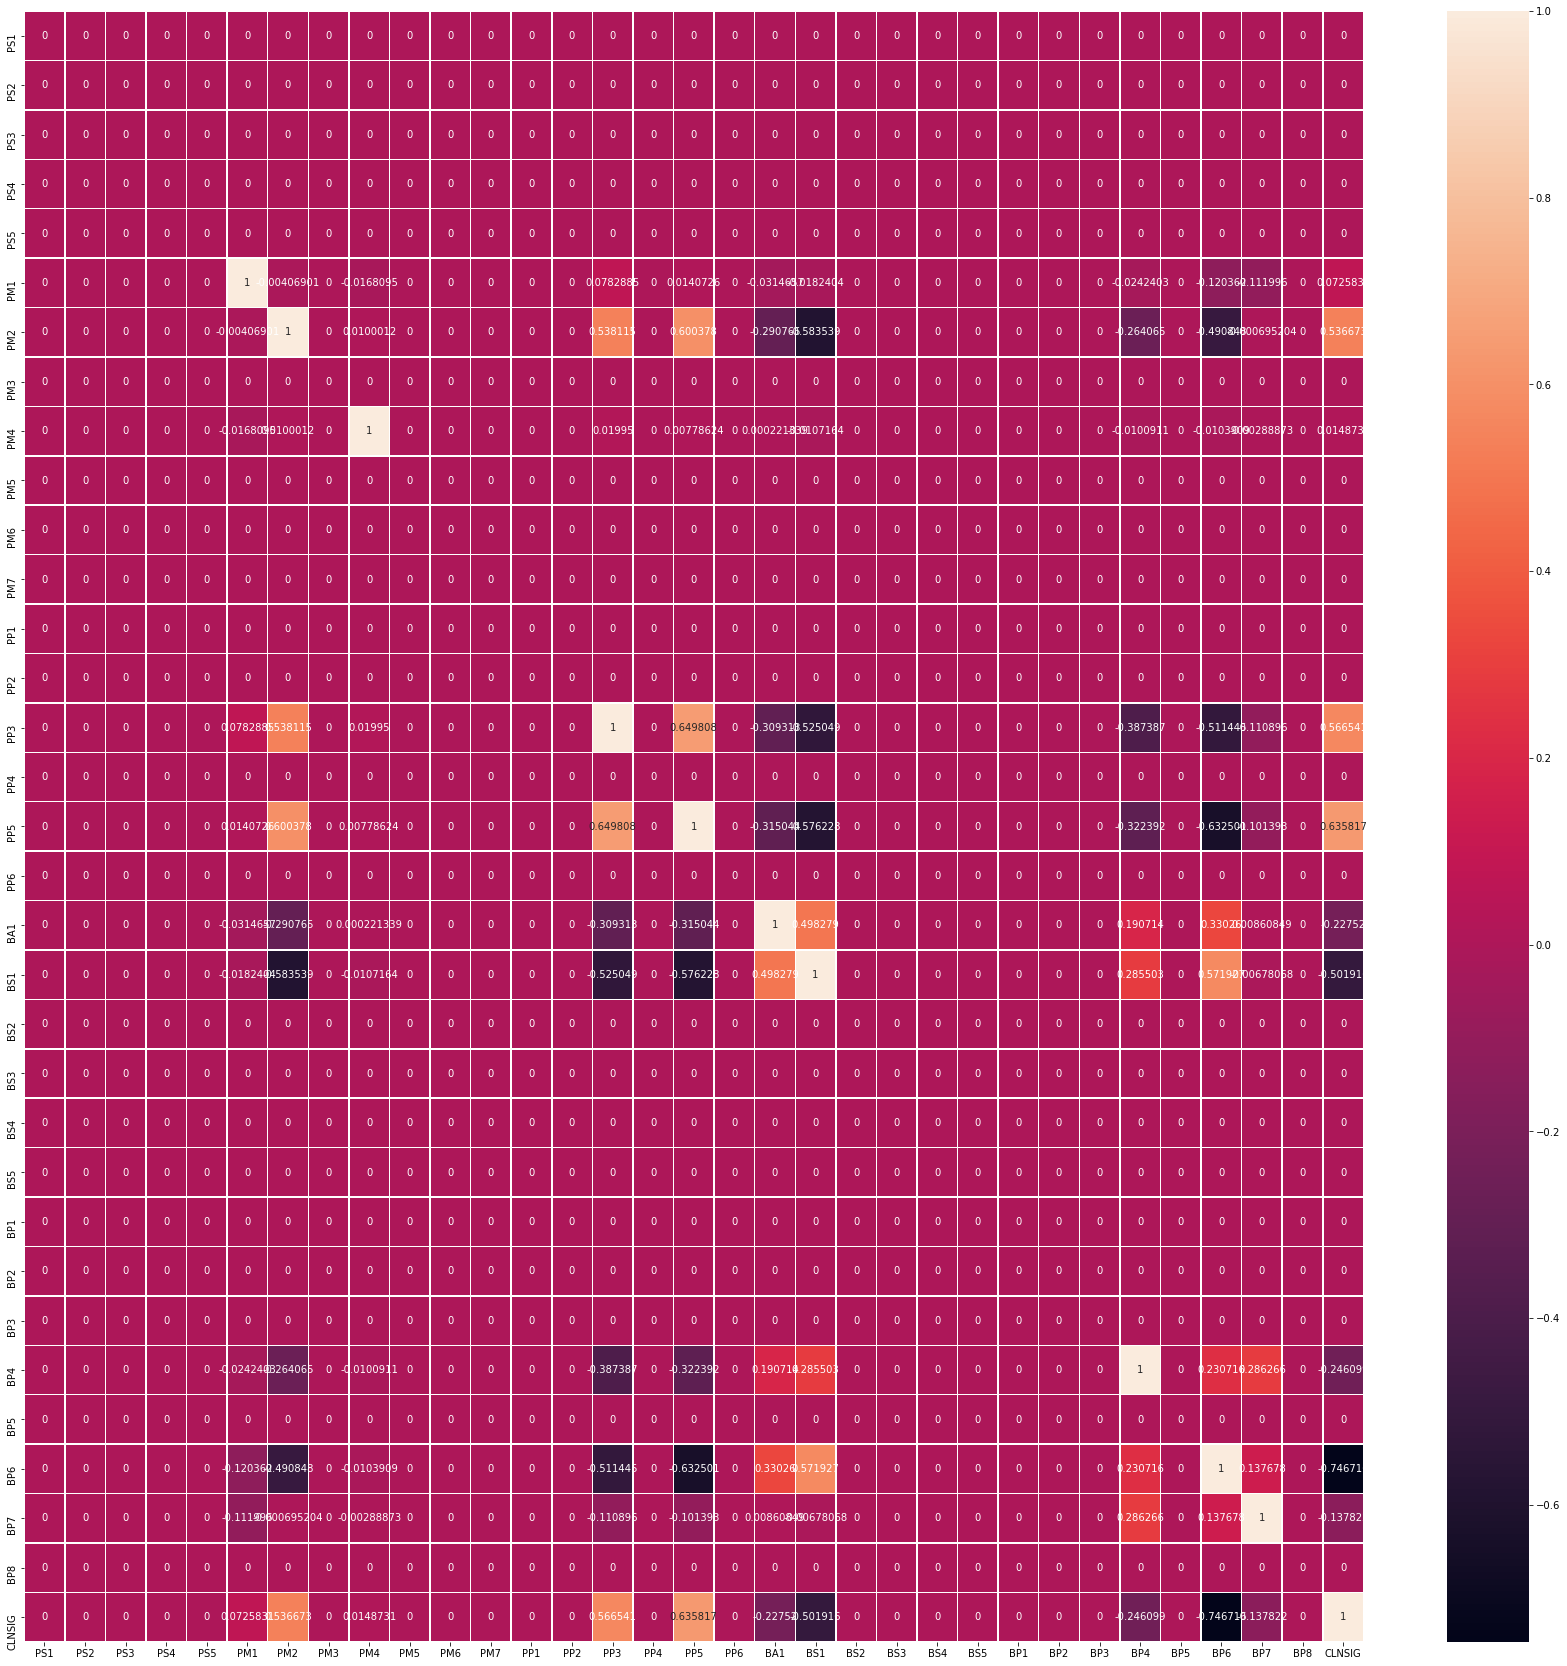

In [29]:
#######
#######
#######             DELETE UNCORRELATED RULES ...


#better_rule_data = rule_data
swiss_train[targett] = swiss_train[targett].replace(['Benign'], 0.0)
swiss_train[targett] = swiss_train[targett].replace(['Pathogenic'], 1.0)
swiss_train = swiss_train.astype('float')
corr = swiss_train.corr()
corr = corr.fillna(0)
display(HTML(corr.to_html()))
plt.figure(figsize = (30,30))
sn.heatmap(corr, annot=True,linewidths=.5, fmt = 'g')
test = corr.loc[targett,:]==0
remove_columns = list()
for idx, value in test.items():
    if value:
        remove_columns.append(idx)

swiss_train = swiss_train.drop(remove_columns, axis=1)
print(remove_columns)

In [30]:
### Better_rule_data will be our data_train, dataset for training cba

swiss_train

,PM1,PM2,PM4,PP3,PP5,BA1,BS1,BP4,BP6,BP7,CLNSIG
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16147,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16148,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16149,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16150,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
######                                                                          ######
######      I divide train data into train and validation for Cross validation   ######
######                                                                              ####

In [45]:
data_train, data_valid = train_test_split(swiss_train, test_size = 0.20, random_state = 44)
txns_train = TransactionDB.from_DataFrame(data_train, target=targett)
txns_valid= TransactionDB.from_DataFrame(data_valid, target=targett)

In [37]:
cba = CBA(support=0.01, confidence=0.3, algorithm="m1",maxlen=6)
supportcv=[0.001,0.05,0.01,0.1]
confidencecv=[0.01,0.1,0.3,0.5]
algocv=["m1","m2"]
maxlencv=[3,4,5,6]

In [52]:
### cross validation
###
###
bestscore=[]

for i in supportcv:
    for j in confidencecv:
     #   for k in algocv:
        for l in maxlencv:
            cba = CBA(support=i, confidence=j, algorithm="m1" ,maxlen=l)
            cba.fit(txns_train)
            accuracy = cba.rule_model_accuracy(txns_valid)
            print(str(accuracy)+ " for parameters " + " " + "support :" + str (i)+ " confidence :"
                +str(j)  +" algocv :"+ str(1) + "maxlencv :" + str(l))
            bestscore.append(accuracy)


0.8625812441968431 for parameters  support :0.001 confidence :0.01 algocv :1maxlencv :3
0.8644382544103992 for parameters  support :0.001 confidence :0.01 algocv :1maxlencv :4
0.8650572578149179 for parameters  support :0.001 confidence :0.01 algocv :1maxlencv :5
0.8650572578149179 for parameters  support :0.001 confidence :0.01 algocv :1maxlencv :6
0.8625812441968431 for parameters  support :0.001 confidence :0.1 algocv :1maxlencv :3
0.8644382544103992 for parameters  support :0.001 confidence :0.1 algocv :1maxlencv :4
0.8650572578149179 for parameters  support :0.001 confidence :0.1 algocv :1maxlencv :5
0.8650572578149179 for parameters  support :0.001 confidence :0.1 algocv :1maxlencv :6
0.8625812441968431 for parameters  support :0.001 confidence :0.3 algocv :1maxlencv :3
0.8644382544103992 for parameters  support :0.001 confidence :0.3 algocv :1maxlencv :4
0.8650572578149179 for parameters  support :0.001 confidence :0.3 algocv :1maxlencv :5
0.8650572578149179 for parameters  supp

In [55]:
index_max = max(range(len(bestscore)), key=bestscore.__getitem__)
index_max

2

In [ ]:
##best score 
## 0.8650572578149179 for parameters  support :0.001 confidence :0.01 algocv :1maxlencv :5

In [58]:
cba_best = CBA(support=0.001, confidence=0.01, algorithm="m1" ,maxlen=5)
cba_best= cba.fit(txns_train)

In [64]:
## we are ready to train and test our data

test_data=pd.read_csv("swiss_test.csv")
len(test_data)

5604

In [67]:
test_data.columns

Index(['gnomAD_exome_ALL', 'gnomAD_exome_EAS', 'gnomAD_exome_FIN',
       'gnomAD_exome_NFE', 'gnomAD_exome_OTH', 'gnomAD_exome_SAS', 'ExAC_ALL',
       'ExAC_AFR', 'ExAC_AMR', 'ExAC_EAS',
       ...
       'X.PP3.0.PP5.0.PM2.0.', 'X.BS1.0.PP5.1.PP3.1.',
       'X.BP4.0.PM1.1.BP6.0.PM2.1.', 'X.BS1.1.PM1.0.', 'X.PP5.1.PP3.1.',
       'X.PM1.1.BP6.0.PM2.1.', 'X.BP4.0.BP6.0.PM2.1.',
       'X.PM1.0.BS1.0.BP6.0.PP3.1.', 'X.PM1.0.BP4.1.', 'clnsig'],
      dtype='object', length=142)

In [83]:
###take related columns
print(test_data.columns.get_loc("BP8"))
print(test_data.columns.get_loc("PS1"))

106
75


In [84]:
index=[]
for x in range(75, 106):

    index.append(x)
 
index.append(-1) 

test_data=test_data.iloc[:,index]

<ipython-input-86-ea1508f33a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["clnsig"] = test_data["clnsig"].replace(['Benign'], 0.0)
<ipython-input-86-ea1508f33a87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["clnsig"] = test_data["clnsig"].replace(['Pathogenic'], 1.0)


,PS1,PS2,PS3,PS4,PS5,PM1,PM2,PM3,PM4,PM5,PM6,PM7,PP1,PP2,PP3,PP4,PP5,PP6,BA1,BS1,BS2,BS3,BS4,BS5,BP1,BP2,BP3,BP4,BP5,BP6,BP7,clnsig
PS1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
PS2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
PS3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
PS4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
PS5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
PM1,0.0,0.0,0.0,0.0,0.0,1.000000,-0.012088,0.0,-0.015701,0.0,0.0,0.0,0.0,0.0,0.053232,0.0,-0.009902,0.0,-0.022399,-0.003476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.0,-0.096467,-0.094130,0.062211
PM2,0.0,0.0,0.0,0.0,0.0,-0.012088,1.000000,0.0,-0.015707,0.0,0.0,0.0,0.0,0.0,0.536225,0.0,0.608078,0.0,-0.309172,-0.585202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.304376,0.0,-0.477184,-0.022762,0.492781
PM3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
PM4,0.0,0.0,0.0,0.0,0.0,-0.015701,-0.015707,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000905,0.0,-0.017743,0.0,0.021887,0.006769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.008466,0.0,-0.012222,-0.002140,0.014450
PM5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


KeyError: 'CLNSIG'

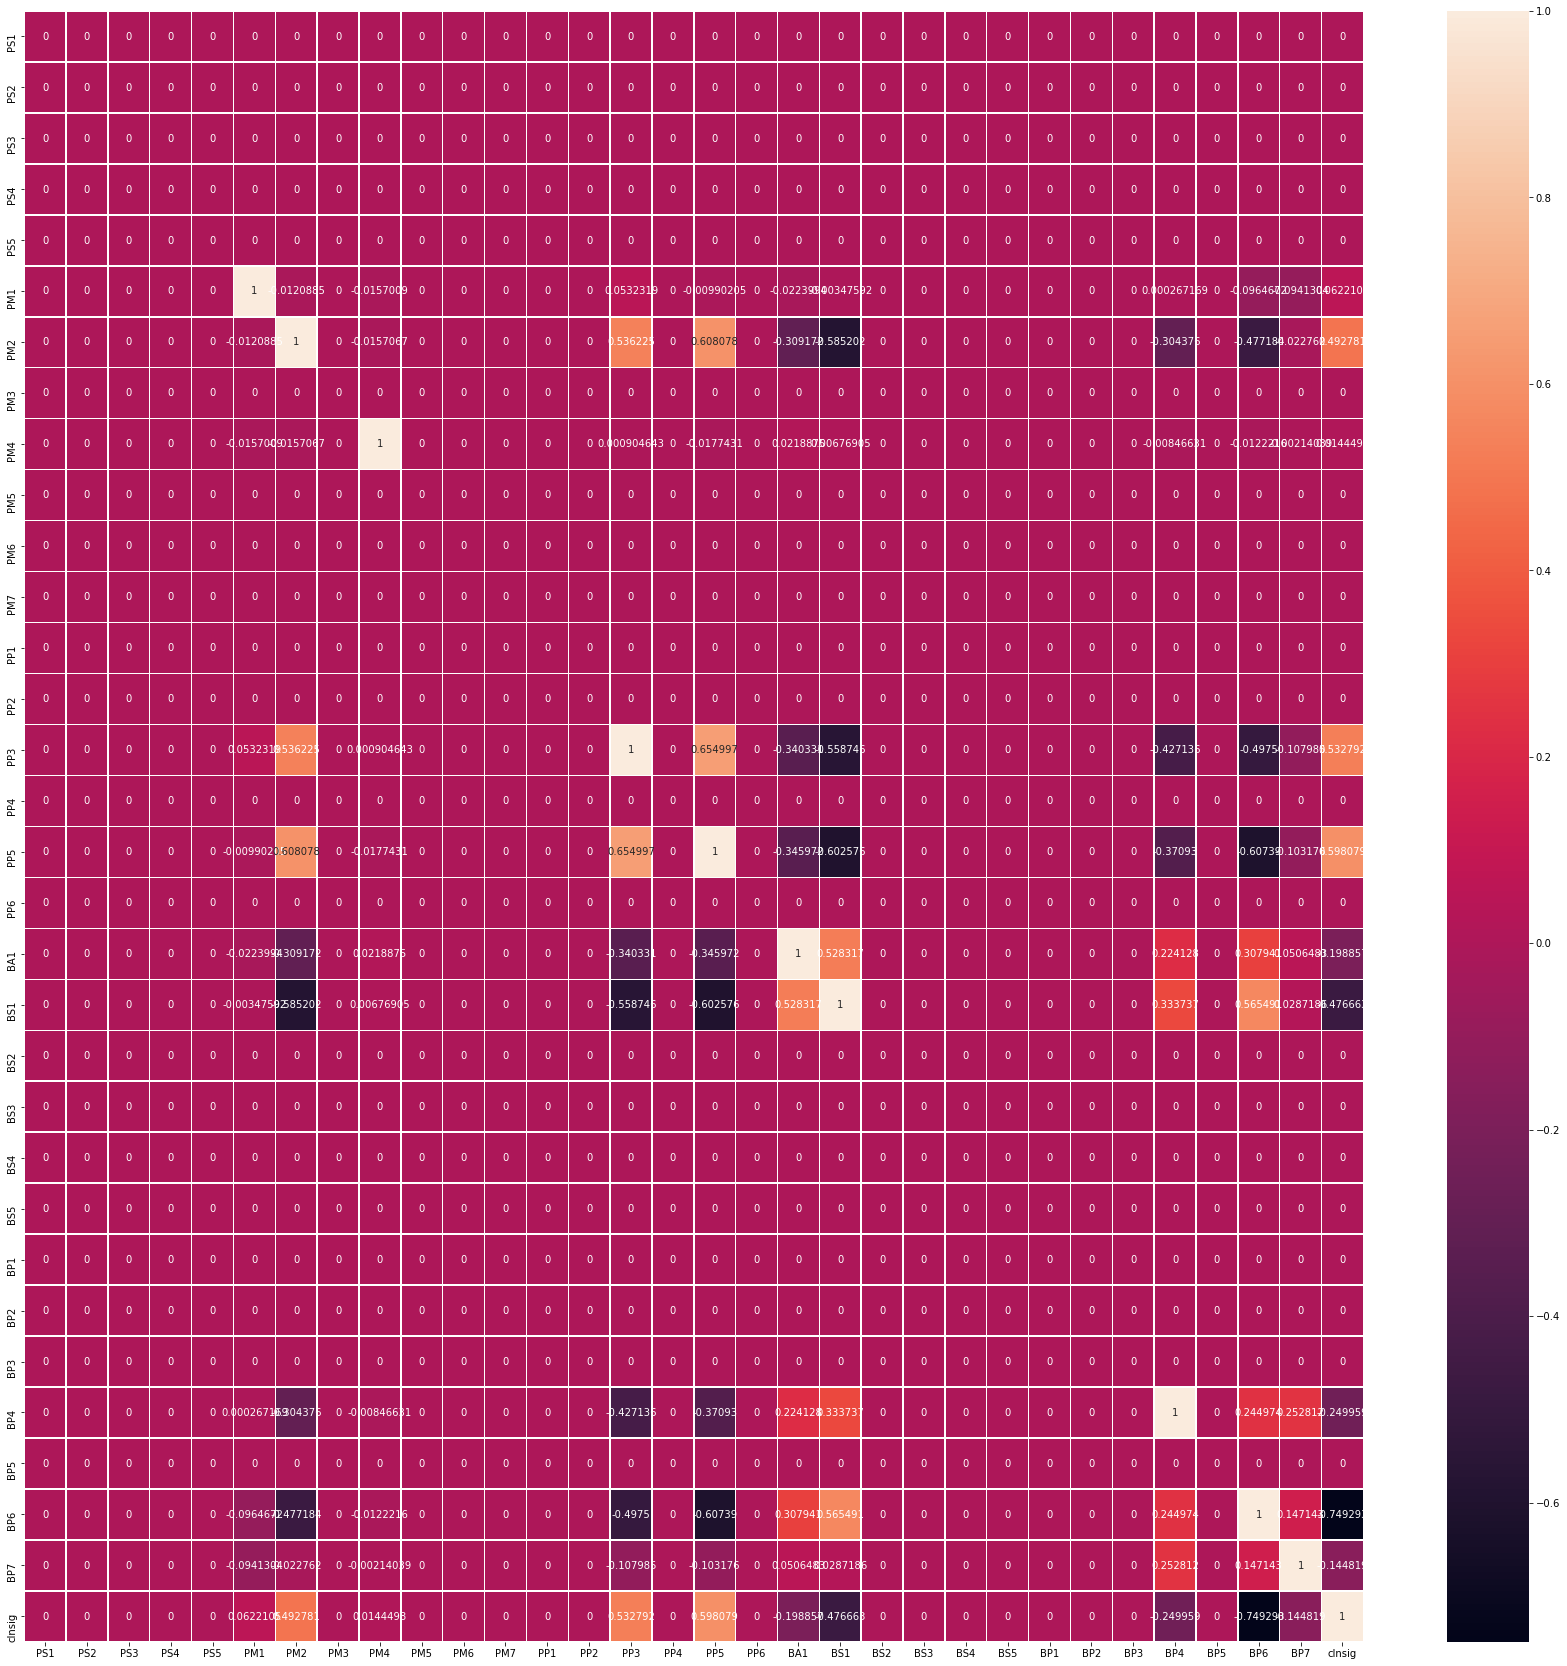

In [86]:
test_data = test_data
test_data["clnsig"] = test_data["clnsig"].replace(['Benign'], 0.0)
test_data["clnsig"] = test_data["clnsig"].replace(['Pathogenic'], 1.0)
test_data = test_data.astype('float')
corr = test_data.corr()
corr = corr.fillna(0)
display(HTML(corr.to_html()))
plt.figure(figsize = (30,30))
sn.heatmap(corr, annot=True,linewidths=.5, fmt = 'g')
test = corr.loc[targett,:]==0
remove_columns = list()
for idx, value in test.items():
    if value:
        remove_columns.append(idx)

test_data = test_data.drop(remove_columns, axis=1)
print(remove_columns)

In [87]:
test_data.head(5)

,PS1,PS2,PS3,PS4,PS5,PM1,PM2,PM3,PM4,PM5,...,BS4,BS5,BP1,BP2,BP3,BP4,BP5,BP6,BP7,clnsig
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
txns_test = TransactionDB.from_DataFrame(test_data, target="clnsig")

In [90]:
accuracy = cba_best.rule_model_accuracy(txns_test) 
accuracy

0.8031763026409707